## Bets ##
Bets would be made using all the avalible models and personal judgement. In order to examin to quality of the models  alone we'll explore wheter averaging the model predictions across 22/23 would've made a profit

## Poisson section ##

In [1]:
#import
import pandas as pd
import math

#read our data
matches= pd.read_csv("data_21.csv")
import matplotlib.pyplot as plt

In [2]:
##A function to calculate the av goals of a team
total_goals=0
def calculate_avg_goals_per_game_scored(df, team_name):
    
    home_matches = df[(df['HomeTeam'] == team_name)]
    away_matches=df[(df['AwayTeam'] == team_name)]
    total_goals = home_matches['FTHG'].sum() + away_matches['FTAG'].sum()
    total_matches = home_matches.shape[0] +away_matches.shape[0]
    avg_goals_per_game = total_goals / total_matches
    return avg_goals_per_game

In [3]:
def poisson(goals, av):
    return (math.exp(-goals) * goals**av) / math.gamma(av+1)

In [4]:

# Get a list of unique entries in the 'Category' column
teams = matches['HomeTeam'].unique().tolist()

In [5]:
av_goals_scored_dict = {item: calculate_avg_goals_per_game_scored(matches,item) for item in teams}
av_goals_scored_dict

{'Brentford': 1.263157894736842,
 'Man United': 1.5,
 'Burnley': 0.8947368421052632,
 'Chelsea': 2.054054054054054,
 'Everton': 1.135135135135135,
 'Leicester': 1.6486486486486487,
 'Watford': 0.8947368421052632,
 'Norwich': 0.6052631578947368,
 'Newcastle': 1.1891891891891893,
 'Tottenham': 1.7837837837837838,
 'Liverpool': 2.473684210526316,
 'Aston Villa': 1.368421052631579,
 'Crystal Palace': 1.3157894736842106,
 'Leeds': 1.135135135135135,
 'Man City': 2.5277777777777777,
 'Brighton': 1.105263157894737,
 'Southampton': 1.131578947368421,
 'Wolves': 1.0,
 'Arsenal': 1.605263157894737,
 'West Ham': 1.5789473684210527}

In [6]:
##A function to calculate the toal goals conceeded
def calculate_avg_goals_per_game_conceeded(df, team_name):
    
    home_matches = df[(df['HomeTeam'] == team_name)]
    away_matches=df[(df['AwayTeam'] == team_name)]
    total_goals = home_matches['FTAG'].sum() + away_matches['FTHG'].sum()
    total_matches = home_matches.shape[0] +away_matches.shape[0]
    avg_goals_per_game = total_goals / total_matches
    return avg_goals_per_game


In [7]:
av_goals_conceeded_dict = {item: calculate_avg_goals_per_game_conceeded(matches,item) for item in teams}
av_goals_conceeded_dict

{'Brentford': 1.4736842105263157,
 'Man United': 1.5,
 'Burnley': 1.394736842105263,
 'Chelsea': 0.8648648648648649,
 'Everton': 1.7837837837837838,
 'Leicester': 1.5135135135135136,
 'Watford': 2.026315789473684,
 'Norwich': 2.210526315789474,
 'Newcastle': 1.5675675675675675,
 'Tottenham': 1.054054054054054,
 'Liverpool': 0.6842105263157895,
 'Aston Villa': 1.4210526315789473,
 'Crystal Palace': 1.2105263157894737,
 'Leeds': 2.027027027027027,
 'Man City': 0.7222222222222222,
 'Brighton': 1.1578947368421053,
 'Southampton': 1.763157894736842,
 'Wolves': 1.131578947368421,
 'Arsenal': 1.263157894736842,
 'West Ham': 1.3421052631578947}

In [8]:
def expected_goals (goals_dict,conceed_dict,home_team,away_team):
    scored=(goals_dict[home_team]+conceed_dict[away_team])/2
    conceed=(goals_dict[away_team]+conceed_dict[home_team])/2
    XtotalG = scored +conceed
    return XtotalG

In [9]:
def poisson_three_or_more(expected_goals):
  
    conj=(math.exp(-expected_goals) * expected_goals**0) / math.factorial(0)+(math.exp(-expected_goals) * expected_goals**1) / math.factorial(1)+(math.exp(-expected_goals) * expected_goals**2) / math.factorial(2)
    XthreeOrMore =1-conj
    return XthreeOrMore


In [10]:
def high_scoring_prob(matches,av_goals_scored_dict,av_goals_conceeded_dict):
    return poisson_three_or_more(expected_goals(av_goals_scored_dict,av_goals_conceeded_dict,matches["HomeTeam"],matches["AwayTeam"]))

In [11]:
matches["high_scoring_prob"]=matches.apply(high_scoring_prob, args=(av_goals_scored_dict,av_goals_conceeded_dict,),axis=1)

In [12]:
print(matches.head())

  Div        Date   Time    HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  \
0  E0  08/13/2021  20:00   Brentford         Arsenal     2     0   H     1   
1  E0  08/14/2021  12:30  Man United           Leeds     5     1   H     1   
2  E0  08/14/2021  15:00     Burnley        Brighton     1     2   A     1   
3  E0  08/14/2021  15:00     Chelsea  Crystal Palace     3     0   H     2   
4  E0  08/14/2021  15:00     Everton     Southampton     3     1   H     0   

   HTAG  ...  AHCh B365CAHH  B365CAHA  PCAHH  PCAHA  MaxCAHH  MaxCAHA  \
0     0  ...  0.50     1.75      2.05   1.81   2.13     2.05     2.17   
1     0  ... -1.00     2.05      1.75   2.17   1.77     2.19     1.93   
2     0  ...  0.25     1.79      2.15   1.81   2.14     1.82     2.19   
3     0  ... -1.50     2.05      1.75   2.12   1.81     2.16     1.93   
4     1  ... -0.50     2.05      1.88   2.05   1.88     2.08     1.90   

   AvgCAHH  AvgCAHA  high_scoring_prob  
0     1.80     2.09           0.531173  
1     2.10

## Bring in the ML model

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
matches["home_code"]= matches["HomeTeam"].astype("category").cat.codes
matches["away_code"]= matches["AwayTeam"].astype("category").cat.codes
matches['Date'] = pd.to_datetime(matches['Date'])
matches["Day_code"] = matches["Date"].dt.dayofweek
matches['ref_code']=matches['Referee'].astype("category").cat.codes
matches['high_scoring'] = (matches['FTHG'] + matches['FTAG'] >= 3).astype(int)



In [15]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=3)

In [16]:
predictors = ["Day_code","home_code","away_code","B365>2.5" ]

In [17]:
model.fit(matches[predictors],matches["high_scoring"])

RandomForestClassifier(min_samples_split=10, random_state=3)

## Now examin the quality of the predicitons made on the 22/23 season ##

In [18]:
#read our new data that we will made predicitons on
matches2= pd.read_csv("season_2223.csv")

#prepare this data
matches2["home_code"]= matches2["HomeTeam"].astype("category").cat.codes
matches2["away_code"]= matches2["AwayTeam"].astype("category").cat.codes
matches2['Date'] = pd.to_datetime(matches2['Date'])
matches2["Day_code"] = matches2["Date"].dt.dayofweek
matches2['ref_code']=matches2['Referee'].astype("category").cat.codes
matches2['high_scoring'] = (matches2['FTHG'] + matches2['FTAG'] >= 3).astype(int)

In [19]:
#predict with the ml model
preds_ml = model.predict(matches2[predictors])

Now examin the expected probabilities using the poisson. We will fid the expected probabiltiy of 3 or more goals for each game based on the preseason scoring average.
Issue of not having average goals for the three promoted teams is 

In [20]:
av_goals_scored_dict["Nott'm Forest"] =1
av_goals_scored_dict["Fulham"]=1
av_goals_scored_dict["Bournemouth"]=1
av_goals_conceeded_dict["Nott'm Forest"]=1.5
av_goals_conceeded_dict["Fulham"]=1.5
av_goals_conceeded_dict["Bournemouth"]=1.5


In [21]:
matches2["high_scoring_prob"]=matches2.apply(high_scoring_prob, args=(av_goals_scored_dict,av_goals_conceeded_dict,),axis=1)

In [22]:
matches2["ml_preds"]=preds_ml
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
prec=precision_score(matches2["high_scoring"],preds_ml)
prec

0.5481171548117155

In [23]:
matches2.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,MaxCAHA,AvgCAHH,AvgCAHA,home_code,away_code,Day_code,ref_code,high_scoring,high_scoring_prob,ml_preds
0,E0,2022-08-05,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.88,2.03,1.85,6,0,4,2,0,0.505731,1
1,E0,2022-08-06,12:30,Fulham,Liverpool,2,2,D,1,0,...,2.06,1.89,1.99,8,11,5,0,1,0.537418,1
2,E0,2022-08-06,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,2.04,1.88,2.00,2,1,5,14,0,0.492743,0
3,E0,2022-08-06,15:00,Leeds,Wolves,2,1,H,1,1,...,1.87,2.08,1.81,9,19,5,16,1,0.493272,0
4,E0,2022-08-06,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,1.97,2.03,1.86,14,15,5,19,0,0.488671,1


## Stratergy ##
Following a simple base stratergy, only bet when ml_preds=1, high_scoring_prob>50  and the implied odds (1/high_scoring_prob) are lower than the best avaible odds.

In [24]:
def bet_made(row):
    implied_odds = 1 / row['high_scoring_prob']
    
    # Set bet_made to 0 if ml_preds contains 0
    if row['ml_preds'] == 0:
        return 0

    # Set bet_made to 1 if bet has been made
    if row['Max>2.5'] > implied_odds and row['ml_preds'] == 1:
        return 1
    
    return 0

matches2['bet_made'] = matches2.apply(lambda row: bet_made(row), axis=1)




In [25]:
matches2.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgCAHH', 'AvgCAHA', 'home_code', 'away_code', 'Day_code', 'ref_code',
       'high_scoring', 'high_scoring_prob', 'ml_preds', 'bet_made'],
      dtype='object', length=114)

In [26]:
matches2['bet_made'] = matches2.apply(lambda row: bet_made(row), axis=1)

In [27]:
##create a function to create a pnl row
def pnl(row):
    if row['bet_made'] == 0:
        return 0
    if row['bet_made'] == 1 and row['high_scoring'] == 1:
        return row['Max>2.5'] -1
    if row['bet_made'] == 1 and row['high_scoring'] == 0:
        return -1

In [28]:
matches2['pnl'] = matches2.apply(pnl, axis=1)

In [29]:
matches2.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgCAHA,home_code,away_code,Day_code,ref_code,high_scoring,high_scoring_prob,ml_preds,bet_made,pnl
0,E0,2022-08-05,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.85,6,0,4,2,0,0.505731,1,1,-1.0
1,E0,2022-08-06,12:30,Fulham,Liverpool,2,2,D,1,0,...,1.99,8,11,5,0,1,0.537418,1,0,0.0
2,E0,2022-08-06,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,2.00,2,1,5,14,0,0.492743,0,0,0.0
3,E0,2022-08-06,15:00,Leeds,Wolves,2,1,H,1,1,...,1.81,9,19,5,16,1,0.493272,0,0,0.0
4,E0,2022-08-06,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,1.86,14,15,5,19,0,0.488671,1,1,-1.0


In [30]:
totalstake=matches2["bet_made"].sum()
totalpnl=matches2['pnl'].sum()

In [31]:

totalstake

103

In [32]:
totalpnl

-5.290000000000001

## Analysis of results ##
looks like we lost a little

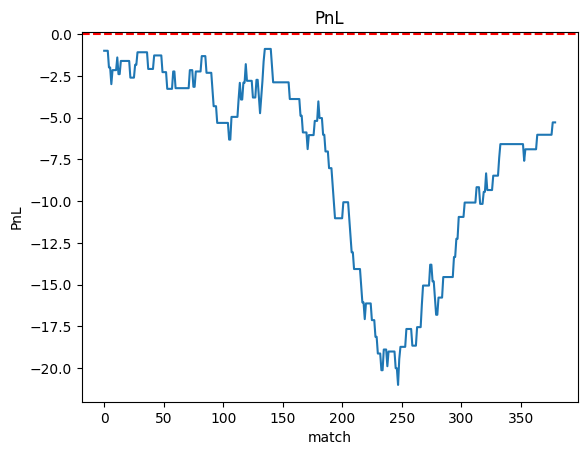

In [33]:
#get the pnl
import numpy as np
pnl_results = matches2.loc[:, 'pnl'].values
pnl_cumulative=np.cumsum(pnl_results)




# plot a graph of pnl
import matplotlib.pyplot as plt
plt.plot(pnl_cumulative)
plt.xlabel('match')
plt.ylabel('PnL')
plt.title('PnL')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [34]:
#counting bets on teams
filtered_df = matches2[matches2['bet_made'] == 1]  # Filter the DataFrame 

#work out most and least bet on teams
team_counts_home = filtered_df['HomeTeam'].value_counts().to_dict()
team_counts_away =filtered_df['AwayTeam'].value_counts().to_dict()



In [35]:
#Make a results table
headers=["Bets_made","profit",'Most_Bet','Least_bet']
answers=[matches2["bet_made"].sum(),totalpnl,'West Ham','Wolves and Fulham']

results = pd.DataFrame({'stat': headers, 'result': answers})
results = results.reset_index(drop=True)
results

,stat,result
0,Bets_made,103
1,profit,-5.29
2,Most_Bet,West Ham
3,Least_bet,Wolves and Fulham


## Compare to other stratergies ##
To examin the merit of the models it is imperative to compare to the performance of other models. As this is a relativly small data set so the varice in the results is likley to be high.

In [36]:
##Bet on all matches with odds >2
def alt_one(row):
    # Set alt_one to 1 if bet has been made
    if row['Max>2.5'] > 2:
        return 1
    else:
        return 0

matches2['alt_one_bets'] = matches2.apply(lambda row: alt_one(row), axis=1)

#Bet when the Poisson model suggest favourable implied odds
def alt_two(row):
    implied_odds = 1 / row['high_scoring_prob']
    
    # Set bet_made to 1 if bet has been made
    if row['Max>2.5'] > implied_odds:
        return 1
    else:
        return 0

matches2['alt_two_bets'] = matches2.apply(lambda row: alt_two(row), axis=1)

#Bet on all matches= alt_three but no bet column is neede for these as all are 1

#Bet soley using the ml model
def alt_four(row):

    # Set bet_made to 0 if ml_preds contains 0
    if row['ml_preds'] == 0:
        return 0

    # Set bet_made to 1 if bet has been made
    if row['ml_preds'] == 1:
        return 1
    
    

matches2['alt_four_bets'] = matches2.apply(lambda row: alt_four(row), axis=1)

In [37]:
#find the pnl for these strats
def pnl_alt_one(row):
    if row['alt_one_bets'] == 0:
        return 0
    if row['alt_one_bets'] == 1 and row['high_scoring'] == 1:
        return row['Max>2.5'] -1
    if row['alt_one_bets'] == 1 and row['high_scoring'] == 0:
        return -1
        
def pnl_alt_two(row):
    if row['alt_two_bets'] == 0:
        return 0
    if row['alt_two_bets'] == 1 and row['high_scoring'] == 1:
        return row['Max>2.5'] -1
    if row['alt_two_bets'] == 1 and row['high_scoring'] == 0:
        return -1
        
def pnl_alt_four(row):
    if row['alt_four_bets'] == 0:
        return 0
    if row['alt_four_bets'] == 1 and row['high_scoring'] == 1:
        return row['Max>2.5'] -1
    if row['alt_four_bets'] == 1 and row['high_scoring'] == 0:
        return -1
        
def pnl_alt_three(row):
    if row['high_scoring']==1:
        return row['Max>2.5'] -1
    else:
        return -1


In [38]:
#add pnl columns for these stratergies
matches2['pnl_alt_one'] = matches2.apply(pnl_alt_one, axis=1)
matches2['pnl_alt_two'] = matches2.apply(pnl_alt_two, axis=1)
matches2['pnl_alt_three'] = matches2.apply(pnl_alt_three, axis=1)
matches2['pnl_alt_four'] = matches2.apply(pnl_alt_four, axis=1)



Text(0.5, 1.0, 'PnL')

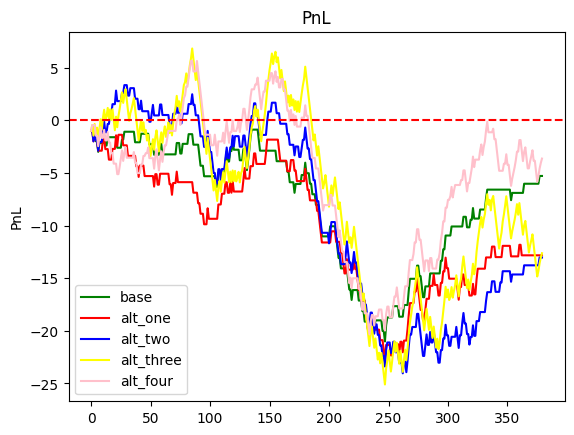

In [39]:
#get the pnl and plot for all 5 strats

#get the pnl
import numpy as np
pnl_results_base = matches2.loc[:, 'pnl'].values
pnl_results_alt_one = matches2.loc[:, 'pnl_alt_one'].values
pnl_results_alt_two = matches2.loc[:, 'pnl_alt_two'].values
pnl_results_alt_three = matches2.loc[:, 'pnl_alt_three'].values
pnl_results_alt_four = matches2.loc[:, 'pnl_alt_four'].values

#get cum pnl
pnl_cumulative_base=np.cumsum(pnl_results_base)
pnl_cumulative_alt_one=np.cumsum(pnl_results_alt_one)
pnl_cumulative_alt_two=np.cumsum(pnl_results_alt_two)
pnl_cumulative_alt_three=np.cumsum(pnl_results_alt_three)
pnl_cumulative_alt_four=np.cumsum(pnl_results_alt_four)



# plot a graph of pnl
import matplotlib.pyplot as plt
pnl_fig=plt.figure()
plt.plot(pnl_cumulative_base, color='green',label='base')
plt.plot(pnl_cumulative_alt_one, color='red', label='alt_one')
plt.plot(pnl_cumulative_alt_two, color='blue', label='alt_two')
plt.plot(pnl_cumulative_alt_three, color='yellow', label='alt_three')
plt.plot(pnl_cumulative_alt_four, color='pink', label='alt_four')
plt.axhline(0, color='red', linestyle='--')
plt.legend()

plt.ylabel('PnL')
plt.title('PnL')


In [40]:
totalpnl_base=matches2['pnl'].sum()
totalpnl_alt_one=matches2['pnl_alt_one'].sum()
totalpnl_alt_two=matches2['pnl_alt_two'].sum()
totalpnl_alt_three=matches2['pnl_alt_three'].sum()
totalpnl_alt_four=matches2['pnl_alt_four'].sum()

In [41]:
results_vector=[totalpnl_base,totalpnl_alt_one,totalpnl_alt_two,totalpnl_alt_three,totalpnl_alt_four]
results_vector

[-5.290000000000001,
 -12.829999999999998,
 -13.040000000000004,
 -12.63,
 -3.639999999999998]

Notes:
The pure Ml model performed the best, the pure poisson model the worst, followed by betting on all matches. The poor poisson model is likley due to using last years average goal scoring and not updating with the current year. The ML model is promising however, taking an early positive position. All strats fell mid season likley due to a goal draught, the world cup occuring at this time may've had an impact of PL games.

## Improving the ML model ##
As the ML model appeared promising, i shall bring in more data to train the model on and see if we can create a profitable stratergy.

In [42]:
#read our data

matches3 = pd.read_csv("data_14_22.csv", parse_dates=['Date'])


#prepare the data
matches3["home_code"]= matches3["HomeTeam"].astype("category").cat.codes
matches3["away_code"]= matches3["AwayTeam"].astype("category").cat.codes
matches3['ref_code']=matches3['Referee'].astype("category").cat.codes


matches3['Date'] = pd.to_datetime(matches3['Date'])

matches3['FTHG'] = matches3['FTHG'].astype(float)
matches3['FTAG'] = matches3['FTAG'].astype(float)

matches3["Day_code"] = matches3["Date"].dt.dayofweek
matches3['high_scoring'] = (matches3['FTHG'] + matches3['FTAG'] >= 3).astype(int)
matches3

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,home_code,away_code,ref_code,Day_code,high_scoring
0,2021-08-13,20:00:00,Brentford,Arsenal,2.0,0.0,H,1,0,H,...,2.13,2.05,2.17,1.80,2.09,3,0,21,4,0
1,2021-08-14,12:30:00,Man United,Leeds,5.0,1.0,H,1,0,H,...,1.77,2.19,1.93,2.10,1.79,16,12,27,5,1
2,2021-08-14,15:00:00,Burnley,Brighton,1.0,2.0,A,1,0,H,...,2.14,1.82,2.19,1.79,2.12,5,4,7,5,1
3,2021-08-14,15:00:00,Chelsea,Crystal Palace,3.0,0.0,H,2,0,H,...,1.81,2.16,1.93,2.06,1.82,6,7,12,5,1
4,2021-08-14,15:00:00,Everton,Southampton,3.0,1.0,H,0,1,A,...,1.88,2.08,1.90,2.03,1.86,8,22,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,2015-05-24,NaN,Hull,Man United,0.0,0.0,D,0,0,D,...,NaN,NaN,NaN,NaN,NaN,11,16,16,6,0
3033,2015-05-24,NaN,Leicester,QPR,5.0,1.0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,13,20,21,6,1
3034,2015-05-24,NaN,Man City,Southampton,2.0,0.0,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,15,22,4,6,0
3035,2015-05-24,NaN,Newcastle,West Ham,2.0,0.0,H,0,0,D,...,NaN,NaN,NaN,NaN,NaN,18,29,17,6,0


In [43]:
model2 = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=3)
predictors = ["Day_code","home_code","away_code","ref_code"]  ##note b365>2.5 had to go as not in larger data set
model.fit(matches3[predictors],matches3["high_scoring"])

RandomForestClassifier(min_samples_split=10, random_state=3)

In [44]:
preds_ml_2 = model.predict(matches2[predictors])
matches2["ml_preds_2"]=preds_ml_2
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
prec=precision_score(matches2["high_scoring"],preds_ml_2)
prec

0.5196078431372549

Lower. So more data=!better. Lets try what we were doing before but with a neural network.

In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
predictors = ['B365>2.5']
target = "high_scoring"
X = matches[predictors]
y = matches[target]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
model3 = MLPClassifier(hidden_layer_sizes=(1000, 500), activation="relu", solver="adam", random_state=42)
model.fit(X_train_scaled, y)



RandomForestClassifier(min_samples_split=10, random_state=3)

In [50]:
X_test = matches2[predictors]
y_test = matches2[target]



X_test_scaled = scaler.transform(X_test)

accuracy = model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

y_pred = model.predict(X_test_scaled)
matches2["new_ml"] = y_pred

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Accuracy: 0.55
Precision: 0.5527272727272727


Intersting it performs best when just working of the data of B365 betting odds.

In [51]:
#Bet soley using the new ml model
def new_ml(row):

    # Set bet_made to 0 if ml_preds contains 0
    if row['new_ml'] == 0:
        return 0

    # Set bet_made to 1 if bet has been made
    if row['new_ml'] == 1:
        return 1
matches2['pnl_new_ml'] = matches2.apply(lambda row: new_ml(row), axis=1)

        
def pnl_new_ml(row):
    if row['new_ml'] == 0:
        return 0
    if row['new_ml'] == 1 and row['high_scoring'] == 1:
        return row['Max>2.5'] -1
    if row['new_ml'] == 1 and row['high_scoring'] == 0:
        return -1

In [52]:
matches2['pnl_new_ml'] = matches2.apply(pnl_new_ml, axis=1)

In [53]:
pnl_results_new = matches2.loc[:, 'pnl_new_ml'].values
pnl_cumulative_new=np.cumsum(pnl_results_new)

In [54]:
totalpnl=pnl_results_new.sum()

Text(0.5, 1.0, 'PnL')

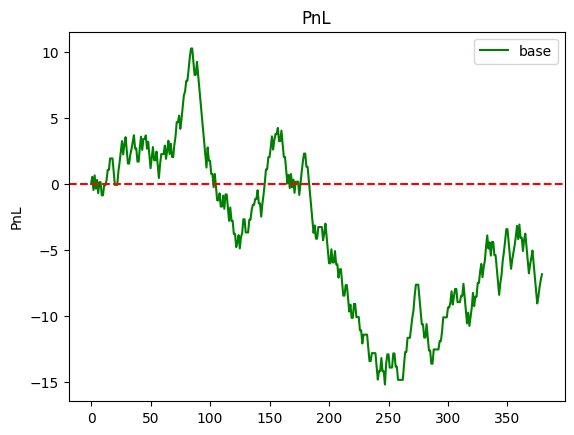

In [55]:
pnl_fig=plt.figure()
plt.plot(pnl_cumulative_new, color='green',label='base')
plt.axhline(0, color='red', linestyle='--')
plt.legend()

plt.ylabel('PnL')
plt.title('PnL')

In [59]:
model3 = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=4)
predictors =['B365>2.5']
model3.fit(matches[predictors],matches["high_scoring"])

RandomForestClassifier(min_samples_split=10, random_state=4)

In [63]:
preds_ml_3 = model.predict(matches2[predictors])
matches2["final_ml"]=preds_ml_3
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
prec=precision_score(matches2["high_scoring"],preds_ml_3)

In [64]:
prec

0.5467625899280576

Text(0.5, 1.0, 'PnL')

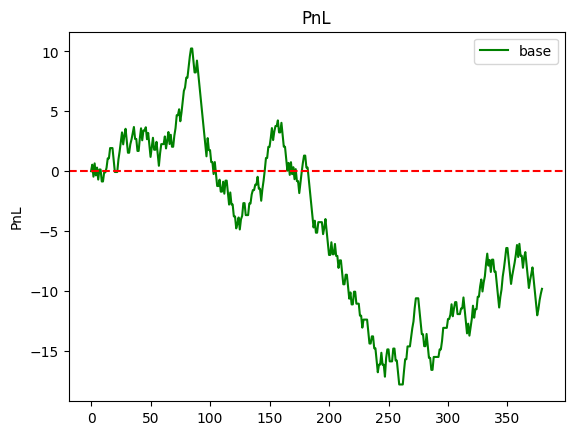

In [65]:
#Bet soley using the new ml model
def final_ml(row):

    # Set bet_made to 0 if ml_preds contains 0
    if row['final_ml'] == 0:
        return 0

    # Set bet_made to 1 if bet has been made
    if row['final_ml'] == 1:
        return 1
matches2['pnl_final_ml'] = matches2.apply(lambda row: final_ml(row), axis=1)

        
def pnl_final_ml(row):
    if row['final_ml'] == 0:
        return 0
    if row['final_ml'] == 1 and row['high_scoring'] == 1:
        return row['Max>2.5'] -1
    if row['final_ml'] == 1 and row['high_scoring'] == 0:
        return -1
matches2['pnl_final_ml'] = matches2.apply(pnl_final_ml, axis=1)
pnl_results_final = matches2.loc[:, 'pnl_final_ml'].values
pnl_cumulative_final=np.cumsum(pnl_results_final)
totalpnl=pnl_results_final.sum()
pnl_fig=plt.figure()
plt.plot(pnl_cumulative_final, color='green',label='base')
plt.axhline(0, color='red', linestyle='--')
plt.legend()

plt.ylabel('PnL')
plt.title('PnL')
